
# <span style="color:BLUE">  Assignment 1: Cleaning of lending datasets
In this notebook, we start by importing and cleaning the LendingClub dataset, which will be used throughout this notebook.

**1. Import the data and important libraries**

In [107]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Define file path
local_file_path = r"/Users/hisay/Desktop/Courses/DSFinance/Data Science in Finance_ Resources" #in HISAY PC

file_path = "python-material/data/1-raw/lending-club-2007-2020Q3"
file_name = "Loan_status_2007-2020Q3-100ksample.csv"
full_path = os.path.join(local_file_path,file_path,file_name)

# Load dataset
df = pd.read_csv(full_path)

# Display the first few rows
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [108]:
#Display the data dictionary -> Understand the labelled column 
local_file_path = r"/Users/hisay/Desktop/Courses/DSFinance/Data Science in Finance_ Resources" #in HISAY PC
file_path = "python-material/data/1-raw/lending-club-2007-2020Q3"
file_name = "LCDataDictionary.xlsx"
file_path = os.path.join(local_file_path,file_path,file_name)

df_dictionary = pd.read_excel(file_path)

# Convert to Markdown format
from IPython.display import Markdown
markdown_table = df_dictionary.to_markdown(index=False)  
print("\n Here is the Dictionary for the list of the variables \n")
display(Markdown(markdown_table))  # Display as Markdown 


 Here is the Dictionary for the list of the variables 



| LoanStatNew                                | Description                                                                                                                                                                                                                               |
|:-------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| acc_now_delinq                             | The number of accounts on which the borrower is now delinquent.                                                                                                                                                                           |
| acc_open_past_24mths                       | Number of trades opened in past 24 months.                                                                                                                                                                                                |
| addr_state                                 | The state provided by the borrower in the loan application                                                                                                                                                                                |
| all_util                                   | Balance to credit limit on all trades                                                                                                                                                                                                     |
| annual_inc                                 | The self-reported annual income provided by the borrower during registration.                                                                                                                                                             |
| annual_inc_joint                           | The combined self-reported annual income provided by the co-borrowers during registration                                                                                                                                                 |
| application_type                           | Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                                                      |
| avg_cur_bal                                | Average current balance of all accounts                                                                                                                                                                                                   |
| bc_open_to_buy                             | Total open to buy on revolving bankcards.                                                                                                                                                                                                 |
| bc_util                                    | Ratio of total current balance to high credit/credit limit for all bankcard accounts.                                                                                                                                                     |
| chargeoff_within_12_mths                   | Number of charge-offs within 12 months                                                                                                                                                                                                    |
| collection_recovery_fee                    | post charge off collection fee                                                                                                                                                                                                            |
| collections_12_mths_ex_med                 | Number of collections in 12 months excluding medical collections                                                                                                                                                                          |
| delinq_2yrs                                | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                                                              |
| delinq_amnt                                | The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                                                        |
| desc                                       | Loan description provided by the borrower                                                                                                                                                                                                 |
| dti                                        | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.                                  |
| dti_joint                                  | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income                        |
| earliest_cr_line                           | The month the borrower's earliest reported credit line was opened                                                                                                                                                                         |
| emp_length                                 | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                                                         |
| emp_title                                  | The job title supplied by the Borrower when applying for the loan.*                                                                                                                                                                       |
| fico_range_high                            | The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                              |
| fico_range_low                             | The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                              |
| funded_amnt                                | The total amount committed to that loan at that point in time.                                                                                                                                                                            |
| funded_amnt_inv                            | The total amount committed by investors for that loan at that point in time.                                                                                                                                                              |
| grade                                      | LC assigned loan grade                                                                                                                                                                                                                    |
| home_ownership                             | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER                                                                                     |
| id                                         | A unique LC assigned ID for the loan listing.                                                                                                                                                                                             |
| il_util                                    | Ratio of total current balance to high credit/credit limit on all install acct                                                                                                                                                            |
| initial_list_status                        | The initial listing status of the loan. Possible values are – W, F                                                                                                                                                                        |
| inq_fi                                     | Number of personal finance inquiries                                                                                                                                                                                                      |
| inq_last_12m                               | Number of credit inquiries in past 12 months                                                                                                                                                                                              |
| inq_last_6mths                             | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                                                          |
| installment                                | The monthly payment owed by the borrower if the loan originates.                                                                                                                                                                          |
| int_rate                                   | Interest Rate on the loan                                                                                                                                                                                                                 |
| issue_d                                    | The month which the loan was funded                                                                                                                                                                                                       |
| last_credit_pull_d                         | The most recent month LC pulled credit for this loan                                                                                                                                                                                      |
| last_fico_range_high                       | The upper boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                      |
| last_fico_range_low                        | The lower boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                      |
| last_pymnt_amnt                            | Last total payment amount received                                                                                                                                                                                                        |
| last_pymnt_d                               | Last month payment was received                                                                                                                                                                                                           |
| loan_amnt                                  | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                                                              |
| loan_status                                | Current status of the loan                                                                                                                                                                                                                |
| max_bal_bc                                 | Maximum current balance owed on all revolving accounts                                                                                                                                                                                    |
| member_id                                  | A unique LC assigned Id for the borrower member.                                                                                                                                                                                          |
| mo_sin_old_il_acct                         | Months since oldest bank installment account opened                                                                                                                                                                                       |
| mo_sin_old_rev_tl_op                       | Months since oldest revolving account opened                                                                                                                                                                                              |
| mo_sin_rcnt_rev_tl_op                      | Months since most recent revolving account opened                                                                                                                                                                                         |
| mo_sin_rcnt_tl                             | Months since most recent account opened                                                                                                                                                                                                   |
| mort_acc                                   | Number of mortgage accounts.                                                                                                                                                                                                              |
| mths_since_last_delinq                     | The number of months since the borrower's last delinquency.                                                                                                                                                                               |
| mths_since_last_major_derog                | Months since most recent 90-day or worse rating                                                                                                                                                                                           |
| mths_since_last_record                     | The number of months since the last public record.                                                                                                                                                                                        |
| mths_since_rcnt_il                         | Months since most recent installment accounts opened                                                                                                                                                                                      |
| mths_since_recent_bc                       | Months since most recent bankcard account opened.                                                                                                                                                                                         |
| mths_since_recent_bc_dlq                   | Months since most recent bankcard delinquency                                                                                                                                                                                             |
| mths_since_recent_inq                      | Months since most recent inquiry.                                                                                                                                                                                                         |
| mths_since_recent_revol_delinq             | Months since most recent revolving delinquency.                                                                                                                                                                                           |
| next_pymnt_d                               | Next scheduled payment date                                                                                                                                                                                                               |
| num_accts_ever_120_pd                      | Number of accounts ever 120 or more days past due                                                                                                                                                                                         |
| num_actv_bc_tl                             | Number of currently active bankcard accounts                                                                                                                                                                                              |
| num_actv_rev_tl                            | Number of currently active revolving trades                                                                                                                                                                                               |
| num_bc_sats                                | Number of satisfactory bankcard accounts                                                                                                                                                                                                  |
| num_bc_tl                                  | Number of bankcard accounts                                                                                                                                                                                                               |
| num_il_tl                                  | Number of installment accounts                                                                                                                                                                                                            |
| num_op_rev_tl                              | Number of open revolving accounts                                                                                                                                                                                                         |
| num_rev_accts                              | Number of revolving accounts                                                                                                                                                                                                              |
| num_rev_tl_bal_gt_0                        | Number of revolving trades with balance >0                                                                                                                                                                                                |
| num_sats                                   | Number of satisfactory accounts                                                                                                                                                                                                           |
| num_tl_120dpd_2m                           | Number of accounts currently 120 days past due (updated in past 2 months)                                                                                                                                                                 |
| num_tl_30dpd                               | Number of accounts currently 30 days past due (updated in past 2 months)                                                                                                                                                                  |
| num_tl_90g_dpd_24m                         | Number of accounts 90 or more days past due in last 24 months                                                                                                                                                                             |
| num_tl_op_past_12m                         | Number of accounts opened in past 12 months                                                                                                                                                                                               |
| open_acc                                   | The number of open credit lines in the borrower's credit file.                                                                                                                                                                            |
| open_acc_6m                                | Number of open trades in last 6 months                                                                                                                                                                                                    |
| open_il_12m                                | Number of installment accounts opened in past 12 months                                                                                                                                                                                   |
| open_il_24m                                | Number of installment accounts opened in past 24 months                                                                                                                                                                                   |
| open_act_il                                | Number of currently active installment trades                                                                                                                                                                                             |
| open_rv_12m                                | Number of revolving trades opened in past 12 months                                                                                                                                                                                       |
| open_rv_24m                                | Number of revolving trades opened in past 24 months                                                                                                                                                                                       |
| out_prncp                                  | Remaining outstanding principal for total amount funded                                                                                                                                                                                   |
| out_prncp_inv                              | Remaining outstanding principal for portion of total amount funded by investors                                                                                                                                                           |
| pct_tl_nvr_dlq                             | Percent of trades never delinquent                                                                                                                                                                                                        |
| percent_bc_gt_75                           | Percentage of all bankcard accounts > 75% of limit.                                                                                                                                                                                       |
| policy_code                                | publicly available policy_code=1                                                                                                                                                                                                          |
|                                            | new products not publicly available policy_code=2                                                                                                                                                                                         |
| pub_rec                                    | Number of derogatory public records                                                                                                                                                                                                       |
| pub_rec_bankruptcies                       | Number of public record bankruptcies                                                                                                                                                                                                      |
| purpose                                    | A category provided by the borrower for the loan request.                                                                                                                                                                                 |
| pymnt_plan                                 | Indicates if a payment plan has been put in place for the loan                                                                                                                                                                            |
| recoveries                                 | post charge off gross recovery                                                                                                                                                                                                            |
| revol_bal                                  | Total credit revolving balance                                                                                                                                                                                                            |
| revol_util                                 | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                                                                |
| sub_grade                                  | LC assigned loan subgrade                                                                                                                                                                                                                 |
| tax_liens                                  | Number of tax liens                                                                                                                                                                                                                       |
| term                                       | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                                                      |
| title                                      | The loan title provided by the borrower                                                                                                                                                                                                   |
| tot_coll_amt                               | Total collection amounts ever owed                                                                                                                                                                                                        |
| tot_cur_bal                                | Total current balance of all accounts                                                                                                                                                                                                     |
| tot_hi_cred_lim                            | Total high credit/credit limit                                                                                                                                                                                                            |
| total_acc                                  | The total number of credit lines currently in the borrower's credit file                                                                                                                                                                  |
| total_bal_ex_mort                          | Total credit balance excluding mortgage                                                                                                                                                                                                   |
| total_bal_il                               | Total current balance of all installment accounts                                                                                                                                                                                         |
| total_bc_limit                             | Total bankcard high credit/credit limit                                                                                                                                                                                                   |
| total_cu_tl                                | Number of finance trades                                                                                                                                                                                                                  |
| total_il_high_credit_limit                 | Total installment high credit/credit limit                                                                                                                                                                                                |
| total_pymnt                                | Payments received to date for total amount funded                                                                                                                                                                                         |
| total_pymnt_inv                            | Payments received to date for portion of total amount funded by investors                                                                                                                                                                 |
| total_rec_int                              | Interest received to date                                                                                                                                                                                                                 |
| total_rec_late_fee                         | Late fees received to date                                                                                                                                                                                                                |
| total_rec_prncp                            | Principal received to date                                                                                                                                                                                                                |
| total_rev_hi_lim                           | Total revolving high credit/credit limit                                                                                                                                                                                                  |
| url                                        | URL for the LC page with listing data.                                                                                                                                                                                                    |
| verification_status                        | Indicates if income was verified by LC, not verified, or if the income source was verified                                                                                                                                                |
| verified_status_joint                      | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified                                                                                                                        |
| zip_code                                   | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                                                     |
| revol_bal_joint                            | Sum of revolving credit balance of the co-borrowers, net of duplicate balances                                                                                                                                                            |
| sec_app_fico_range_low                     | FICO range (high) for the secondary applicant                                                                                                                                                                                             |
| sec_app_fico_range_high                    | FICO range (low) for the secondary applicant                                                                                                                                                                                              |
| sec_app_earliest_cr_line                   | Earliest credit line at time of application for the secondary applicant                                                                                                                                                                   |
| sec_app_inq_last_6mths                     | Credit inquiries in the last 6 months at time of application for the secondary applicant                                                                                                                                                  |
| sec_app_mort_acc                           | Number of mortgage accounts at time of application for the secondary applicant                                                                                                                                                            |
| sec_app_open_acc                           | Number of open trades at time of application for the secondary applicant                                                                                                                                                                  |
| sec_app_revol_util                         | Ratio of total current balance to high credit/credit limit for all revolving accounts                                                                                                                                                     |
| sec_app_open_act_il                        | Number of currently active installment trades at time of application for the secondary applicant                                                                                                                                          |
| sec_app_num_rev_accts                      | Number of revolving accounts at time of application for the secondary applicant                                                                                                                                                           |
| sec_app_chargeoff_within_12_mths           | Number of charge-offs within last 12 months at time of application for the secondary applicant                                                                                                                                            |
| sec_app_collections_12_mths_ex_med         | Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant                                                                                                              |
| sec_app_mths_since_last_major_derog        | Months since most recent 90-day or worse rating at time of application for the secondary applicant                                                                                                                                        |
| hardship_flag                              | Flags whether or not the borrower is on a hardship plan                                                                                                                                                                                   |
| hardship_type                              | Describes the hardship plan offering                                                                                                                                                                                                      |
| hardship_reason                            | Describes the reason the hardship plan was offered                                                                                                                                                                                        |
| hardship_status                            | Describes if the hardship plan is active, pending, canceled, completed, or broken                                                                                                                                                         |
| deferral_term                              | Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan                                                                                                             |
| hardship_amount                            | The interest payment that the borrower has committed to make each month while they are on a hardship plan                                                                                                                                 |
| hardship_start_date                        | The start date of the hardship plan period                                                                                                                                                                                                |
| hardship_end_date                          | The end date of the hardship plan period                                                                                                                                                                                                  |
| payment_plan_start_date                    | The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments. |
| hardship_length                            | The number of months the borrower will make smaller payments than normally obligated due to a hardship plan                                                                                                                               |
| hardship_dpd                               | Account days past due as of the hardship plan start date                                                                                                                                                                                  |
| hardship_loan_status                       | Loan Status as of the hardship plan start date                                                                                                                                                                                            |
| orig_projected_additional_accrued_interest | The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.                     |
| hardship_payoff_balance_amount             | The payoff balance amount as of the hardship plan start date                                                                                                                                                                              |
| hardship_last_payment_amount               | The last payment amount as of the hardship plan start date                                                                                                                                                                                |
| disbursement_method                        | The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY                                                                                                                                               |
| debt_settlement_flag                       | Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.                                                                                                                                        |
| debt_settlement_flag_date                  | The most recent date that the Debt_Settlement_Flag has been set                                                                                                                                                                           |
| settlement_status                          | The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT                                                                                                                     |
| settlement_date                            | The date that the borrower agrees to the settlement plan                                                                                                                                                                                  |
| settlement_amount                          | The loan amount that the borrower has agreed to settle for                                                                                                                                                                                |
| settlement_percentage                      | The settlement amount as a percentage of the payoff balance amount on the loan                                                                                                                                                            |
| settlement_term                            | The number of months that the borrower will be on the settlement plan                                                                                                                                                                     |
| nan                                        | nan                                                                                                                                                                                                                                       |
| nan                                        | * Employer Title replaces Employer Name for all loans listed after 9/23/2013                                                                                                                                                              |

2.  ### <span style="color:BLUE"> Identifying important variables for further analysis $\rightarrow$  Classify in terms of common metrics 
---
**Borrower's credit history**
- `fico_range_high / fico_range_low` – Borrower’s FICO credit score range at loan origination. -->`Imp`
- `inq_last_6mths` – Number of credit inquiries in the last 6 months. -->`Imp`
- `delinq_2yrs` – Number of times the borrower was 30+ days delinquent in the last 2 years.
- `pub_rec` – Number of derogatory public records.
- `pub_rec_bankruptcies` – Number of bankruptcies recorded. -->`Imp`
- `revol_util` – Revolving line utilization rate.
- `mths_since_last_delinq` – Months since the last delinquency. 

**Financial Stability/Collateral**
- `annual_inc` – Borrower’s self-reported annual income. -->`Imp`
- `dti` – Debt-to-income ratio (lower is better).        -->`Imp`
- `home_ownership` – Indicates if the borrower owns a home (MORTGAGE, RENT, OWN). -->`Imp`
- `loan_amnt` – The amount of loan requested.            -->`Imp`
- `funded_amnt` – The total amount actually funded.      -->`Imp`
- `installment` – The monthly payment amount.            -->`Imp`

**Employment and Income Verification**
- `emp_length` – Employment length in years (stability in employment matters).
- `emp_title` – Borrower’s job title.
- `verification_status` – Whether the income is verified (Verified, Source Verified, Not Verified).

**Loan Performance Metrics**
- `loan_status` – Current loan status (Fully Paid, Charged Off, Late, Default). -->`Imp`
- `total_rec_prncp` – Total principal received to date.
- `total_rec_int` – Total interest received to date.
- `recoveries` – Amount recovered from charged-off loans.
- `out_prncp` – Remaining outstanding principal.
- `out_prncp_inv` – Remaining outstanding principal funded by investors.      -->`Imp` *

**Existing Debt and Liabilities**
- `total_acc` – Total number of credit lines.
- `open_acc` – Number of open credit lines.
- `num_tl_90g_dpd_24m` – Number of accounts 90+ days past due in the last 24 months.
- `max_bal_bc` – Maximum current balance on all revolving accounts.
- `bc_util` – Ratio of total balance to credit limit for bankcard accounts. 

**Loan Purpose and Type**

- `purpose` – The reason for taking the loan (e.g., credit card debt consolidation, home improvement).-->`Imp`
- `term` – Number of months for loan repayment (36 or 60 months).-->`Imp`
- `int_rate` – The interest rate assigned to the loan.
- `sub_grade` – Loan sub-grade assigned by Lending Club.
---
<span style="color:BLUE"> **Most Important Variables for Loan Approval**
- `(fico_range_high + fico_range_low)/2` $\rightarrow$  FICO credit score 
- `inq_last_6mths` $\rightarrow$   Recent credit inquiries 
- `pub_rec_bankruptcies` $\rightarrow$  Number of bankruptcies recorded
- `annual_inc` $\rightarrow$  Self-reported annual income
- `dti` $\rightarrow$  Debt-to-income ratio (lower is better)
- `home_ownership` $\rightarrow$  MORTGAGE, RENT, OWN (Financial status)
- `loan_amnt` $\rightarrow$  Loan amount requested
- `loan_status` $\rightarrow$  Loan status (Fully Paid, Charged Off, Late, Default)
- `out_prncp_inv` $\rightarrow$  Remaining outstanding principal
- `purpose` $\rightarrow$  Reason for loan (e.g., credit card debt consolidation, home improvement)
- `term` $\rightarrow$  Duration for loan repayment (36 or 60 months)

These variables help **assess risk**, determine the **borrower’s ability to repay**, and predict **loan performance**.


In [110]:
#Make a clean data frame with the most important columns
df_clean = df[["id", "annual_inc", "fico_range_high", "fico_range_low", "inq_last_6mths", "pub_rec_bankruptcies", 
               "dti", "home_ownership", "loan_amnt", 
               "loan_status", "out_prncp_inv","purpose" ]]

df_clean.head()

,id,annual_inc,fico_range_high,fico_range_low,inq_last_6mths,pub_rec_bankruptcies,dti,home_ownership,loan_amnt,loan_status,out_prncp_inv,purpose
0,167338079,48000.0,669.0,665.0,0.0,1.0,20.25,MORTGAGE,4000.0,Current,3816.34,home_improvement
1,71016917,57000.0,684.0,680.0,0.0,0.0,25.33,RENT,24000.0,Current,4333.29,credit_card
2,39589826,55000.0,669.0,665.0,0.0,0.0,7.22,MORTGAGE,5000.0,Fully Paid,0.00,credit_card
3,134798709,43500.0,754.0,750.0,0.0,0.0,24.55,MORTGAGE,24000.0,Current,16317.69,debt_consolidation
4,127097355,48000.0,739.0,735.0,1.0,0.0,24.30,MORTGAGE,14000.0,Fully Paid,0.00,debt_consolidation


In [111]:
#df_clean["fico_score"] = df["fico_range_high"]/ df["fico_range_low"]
df_clean.dtypes

id                        int64
annual_inc              float64
fico_range_high         float64
fico_range_low          float64
inq_last_6mths          float64
pub_rec_bankruptcies    float64
dti                     float64
home_ownership           object
loan_amnt               float64
loan_status              object
out_prncp_inv           float64
purpose                  object
dtype: object

In [112]:
print(f"df shape: {df_clean.shape}")

df shape: (100000, 12)


**3. Introduce a label `fico ratio` which is actually a FICO credit score**

In [114]:
df_clean = df_clean.copy()  # Create a copy to avoid modifying the original DataFrame
df_clean["fico_score"] = (df_clean["fico_range_high"] + df_clean["fico_range_low"])/ (2) #add the column named fico_score
df_clean.head() 

,id,annual_inc,fico_range_high,fico_range_low,inq_last_6mths,pub_rec_bankruptcies,dti,home_ownership,loan_amnt,loan_status,out_prncp_inv,purpose,fico_score
0,167338079,48000.0,669.0,665.0,0.0,1.0,20.25,MORTGAGE,4000.0,Current,3816.34,home_improvement,667.0
1,71016917,57000.0,684.0,680.0,0.0,0.0,25.33,RENT,24000.0,Current,4333.29,credit_card,682.0
2,39589826,55000.0,669.0,665.0,0.0,0.0,7.22,MORTGAGE,5000.0,Fully Paid,0.00,credit_card,667.0
3,134798709,43500.0,754.0,750.0,0.0,0.0,24.55,MORTGAGE,24000.0,Current,16317.69,debt_consolidation,752.0
4,127097355,48000.0,739.0,735.0,1.0,0.0,24.30,MORTGAGE,14000.0,Fully Paid,0.00,debt_consolidation,737.0


**4. Drop the labels which are redundant**

In [116]:
# 
list_to_drop = ["fico_range_high", "fico_range_low"]
df_lending_data = df_clean.drop(list_to_drop, axis = 1) 
#axis = 1, removes column, axis = 0 removes row
df_lending_data.head()                                                       

,id,annual_inc,inq_last_6mths,pub_rec_bankruptcies,dti,home_ownership,loan_amnt,loan_status,out_prncp_inv,purpose,fico_score
0,167338079,48000.0,0.0,1.0,20.25,MORTGAGE,4000.0,Current,3816.34,home_improvement,667.0
1,71016917,57000.0,0.0,0.0,25.33,RENT,24000.0,Current,4333.29,credit_card,682.0
2,39589826,55000.0,0.0,0.0,7.22,MORTGAGE,5000.0,Fully Paid,0.00,credit_card,667.0
3,134798709,43500.0,0.0,0.0,24.55,MORTGAGE,24000.0,Current,16317.69,debt_consolidation,752.0
4,127097355,48000.0,1.0,0.0,24.30,MORTGAGE,14000.0,Fully Paid,0.00,debt_consolidation,737.0


In [117]:
#Arrange the labels
new_column_order = ["id", "annual_inc", "fico_score", "inq_last_6mths", 
                    "pub_rec_bankruptcies", "dti",
                     "loan_amnt","loan_status", "out_prncp_inv",
                    "home_ownership", "purpose"]
df_reordered = df_lending_data[new_column_order]
df_reordered.head()


,id,annual_inc,fico_score,inq_last_6mths,pub_rec_bankruptcies,dti,loan_amnt,loan_status,out_prncp_inv,home_ownership,purpose
0,167338079,48000.0,667.0,0.0,1.0,20.25,4000.0,Current,3816.34,MORTGAGE,home_improvement
1,71016917,57000.0,682.0,0.0,0.0,25.33,24000.0,Current,4333.29,RENT,credit_card
2,39589826,55000.0,667.0,0.0,0.0,7.22,5000.0,Fully Paid,0.00,MORTGAGE,credit_card
3,134798709,43500.0,752.0,0.0,0.0,24.55,24000.0,Current,16317.69,MORTGAGE,debt_consolidation
4,127097355,48000.0,737.0,1.0,0.0,24.30,14000.0,Fully Paid,0.00,MORTGAGE,debt_consolidation


In [118]:
#Rename the dataframe 
df_lending = df_reordered
df_lending.head()

,id,annual_inc,fico_score,inq_last_6mths,pub_rec_bankruptcies,dti,loan_amnt,loan_status,out_prncp_inv,home_ownership,purpose
0,167338079,48000.0,667.0,0.0,1.0,20.25,4000.0,Current,3816.34,MORTGAGE,home_improvement
1,71016917,57000.0,682.0,0.0,0.0,25.33,24000.0,Current,4333.29,RENT,credit_card
2,39589826,55000.0,667.0,0.0,0.0,7.22,5000.0,Fully Paid,0.00,MORTGAGE,credit_card
3,134798709,43500.0,752.0,0.0,0.0,24.55,24000.0,Current,16317.69,MORTGAGE,debt_consolidation
4,127097355,48000.0,737.0,1.0,0.0,24.30,14000.0,Fully Paid,0.00,MORTGAGE,debt_consolidation


**5. Checking for missing values**

In [120]:
# Checking for missing values
df_lending.isnull().sum()

id                        0
annual_inc                0
fico_score                0
inq_last_6mths            0
pub_rec_bankruptcies     45
dti                     102
loan_amnt                 0
loan_status               0
out_prncp_inv             0
home_ownership            0
purpose                   0
dtype: int64

From the above result it's apparent
45 `pub_rec_bankruptcies` and 102 `dti` entries are empty or do not contain numeric values. 

**6. Descriptive statistics of the numeric columns**

In [123]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_lending.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,id,annual_inc,fico_score,inq_last_6mths,pub_rec_bankruptcies,dti,loan_amnt,out_prncp_inv
count,100000.00,100000.00,100000.00,100000.00,99955.00,99898.00,100000.00,100000.00
mean,97894846.43,80029.18,702.64,0.55,0.12,19.33,15332.37,4031.44
std,51147363.88,87224.34,33.80,0.86,0.35,17.28,9468.19,7464.71
min,56413.00,0.00,642.00,0.00,0.00,-1.00,700.00,0.00
25%,59070843.25,47160.50,677.00,0.00,0.00,12.06,8000.00,0.00
50%,107808290.50,66000.00,697.00,0.00,0.00,18.10,13000.00,0.00
75%,143359217.75,95000.00,722.00,1.00,0.00,24.87,20000.00,5314.93
max,170995595.00,10999200.00,847.50,25.00,7.00,999.00,40000.00,40000.00


From the summary of numeric columns, it's apparent that labels `['pub_rec_bankruptcies', 'dti']` have either categorical or empty entries (numerals < 100000). So let's confirm and detect them either empty (completely missing), contain NaN values, or are categorical instead of numeric, you can use the following approach:

In [125]:
columns_with_nan = df_lending.columns[df_lending.isna().any()].tolist()
empty_columns = df_lending.columns[df_lending.isna().all()].tolist()

print("Columns with NaN:", columns_with_nan)
print("Completely Empty Columns:", empty_columns)

Columns with NaN: ['pub_rec_bankruptcies', 'dti']
Completely Empty Columns: []


Therefore it's apparent that there is no empty columns rather there are columns: `['pub_rec_bankruptcies', 'dti']` with NaN. 

**7. Check the categorical columns**

In [128]:
#Check the categorical columns
df_categorical = df_lending.select_dtypes(include=['object'])
print("\n List the categorical columns:\n")
df_categorical.head()


 List the categorical columns:



,loan_status,home_ownership,purpose
0,Current,MORTGAGE,home_improvement
1,Current,RENT,credit_card
2,Fully Paid,MORTGAGE,credit_card
3,Current,MORTGAGE,debt_consolidation
4,Fully Paid,MORTGAGE,debt_consolidation


**8. Remove rows of `['pub_rec_bankruptcies', 'dti']` with NaN**

In [130]:
#Remove rows of `['pub_rec_bankruptcies', 'dti']` with NaN  
df_lending = df_lending.dropna(subset=['pub_rec_bankruptcies', 'dti'])
#Check the columns with NaN
columns_with_nan = df_lending.columns[df_lending.isna().any()].tolist()
empty_columns = df_lending.columns[df_lending.isna().all()].tolist()

print("Columns with NaN:", columns_with_nan)
print("Completely Empty Columns:", empty_columns)

Columns with NaN: []
Completely Empty Columns: []


**All cleaned!**

**Note**: Filling the empty cells with mean or median is risky in this table as it can create a strong bias. 

**9. Check duplicate rows and remove them**

In [133]:
#Check duplicate rows
duplicates = df_lending.duplicated().sum()
duplicates

0

In [134]:
# Removing duplicate rows
df_deduped = df_lending.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_50412/3283687580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped = df_lending.drop_duplicates(inplace=True)


***10. Checking categorical data `["loan_status", "home_ownership", "purpose"]`***

In [136]:
def list_unique_categories(df, column_name):
    if column_name in df.columns:
        unique_values = df[column_name].unique().tolist()
        unique_count = len(unique_values)
        return unique_values, unique_count
        
Cols = ["loan_status", "home_ownership", "purpose"]
for col in Cols:
    unique_quantity = list_unique_categories(df_lending, col)
    print(f"\n {col}: {unique_quantity}") 


 loan_status: (['Current', 'Fully Paid', 'Charged Off', 'Issued', 'Late (31-120 days)', 'In Grace Period', 'Default', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'], 10)

 home_ownership: (['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], 6)

 purpose: (['home_improvement', 'credit_card', 'debt_consolidation', 'moving', 'vacation', 'other', 'car', 'medical', 'house', 'small_business', 'major_purchase', 'wedding', 'renewable_energy', 'educational'], 14)


<span style="color:BLUE"> There are 10 types of unique categorical data in `loan_status`, 6 types in `home_ownership` and 14 `purpose`. Usually, these categorical data can be dealt through hot encodings..

In [138]:
#Reducing the labels of a loan status
# Define a mapping dictionary for clustering similar loan statuses
loan_status_mapping = {
    "Fully Paid": "Good Standing",
    "Current": "Good Standing",
    "Late (16-30 days)": "Late Payment",
    "Late (31-120 days)": "Late Payment",
    "In Grace Period": "Late Payment",
    "Charged Off": "Defaulted",
    "Default": "Defaulted",
    "Issued": "New Loan",
    "Does not meet the credit policy. Status:Fully Paid": "Policy Exception",
    "Does not meet the credit policy. Status:Charged Off": "Policy Exception"
}

# Apply clustering
df_lending["loan_status_new"] = df_lending["loan_status"].map(loan_status_mapping)

#Categorical data for the loan_status is clustered into 5 categories from 10
print("\n The new loan status is as follows:")
df_lending 



 The new loan status is as follows:


/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_50412/4204357736.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lending["loan_status_new"] = df_lending["loan_status"].map(loan_status_mapping)


,id,annual_inc,fico_score,inq_last_6mths,pub_rec_bankruptcies,dti,loan_amnt,loan_status,out_prncp_inv,home_ownership,purpose,loan_status_new
0,167338079,48000.0,667.0,0.0,1.0,20.25,4000.0,Current,3816.34,MORTGAGE,home_improvement,Good Standing
1,71016917,57000.0,682.0,0.0,0.0,25.33,24000.0,Current,4333.29,RENT,credit_card,Good Standing
2,39589826,55000.0,667.0,0.0,0.0,7.22,5000.0,Fully Paid,0.00,MORTGAGE,credit_card,Good Standing
3,134798709,43500.0,752.0,0.0,0.0,24.55,24000.0,Current,16317.69,MORTGAGE,debt_consolidation,Good Standing
4,127097355,48000.0,737.0,1.0,0.0,24.30,14000.0,Fully Paid,0.00,MORTGAGE,debt_consolidation,Good Standing
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,85585726,60000.0,672.0,1.0,0.0,17.98,3300.0,Fully Paid,0.00,MORTGAGE,other,Good Standing
99996,68826226,150000.0,717.0,4.0,0.0,13.13,6000.0,Fully Paid,0.00,RENT,major_purchase,Good Standing
99997,83837196,48000.0,662.0,1.0,0.0,27.79,10000.0,Charged Off,0.00,RENT,debt_consolidation,Defaulted
99998,158432991,90000.0,767.0,0.0,0.0,27.58,10625.0,Current,8499.51,MORTGAGE,debt_consolidation,Good Standing


### 9. **Understanding `FICO Score`**
The **FICO Score** is a derived metric related to **credit scores**. It is typically defined as:

$\text{FICO score} = \frac{\text{Maxium FICO Score} + \text{Minimum FICO Score}}{2}$


where:
- **FICO Score** is a numeric representation of an individual's creditworthiness (ranges between **300 - 850**).
- **Maximum Possible FICO Score** is typically **850**.

This ratio helps normalize FICO scores across different applicants, making it easier to compare creditworthiness.

| **Score Range** | **Rating**       | **Meaning** |
|---------------|----------------|--------------------------------------------------|
| **800 – 850** | Exceptional    | Very low risk of default, best loan terms.      |
| **740 – 799** | Very Good      | Low risk, qualifies for good interest rates.    |
| **670 – 739** | Good           | Moderate risk, considered an acceptable borrower. |
| **580 – 669** | Fair           | Higher risk, may face higher interest rates.    |
| **300 – 579** | Poor           | High risk, may struggle to get approved for credit. |



Text(0, 0.5, 'Frequency')

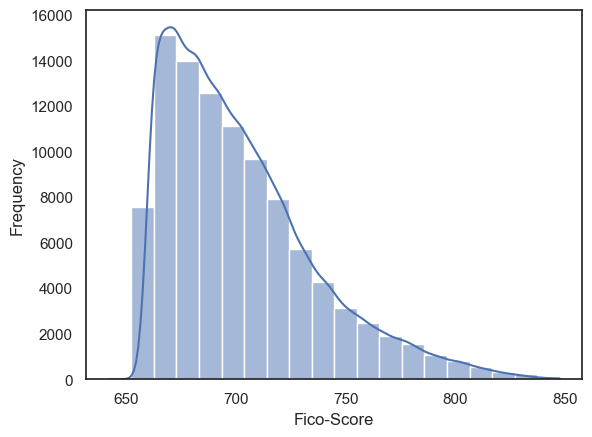

In [140]:
from scipy import stats
import numpy as np
import seaborn as sns

sns.histplot(df_lending["fico_score"], bins = 20, kde = True)
plt.xlabel("Fico-Score")
plt.ylabel("Frequency")

> The distribution resembles a **Poisson distribution**, indicating that the majority of candidates fall into the **moderate risk** category.

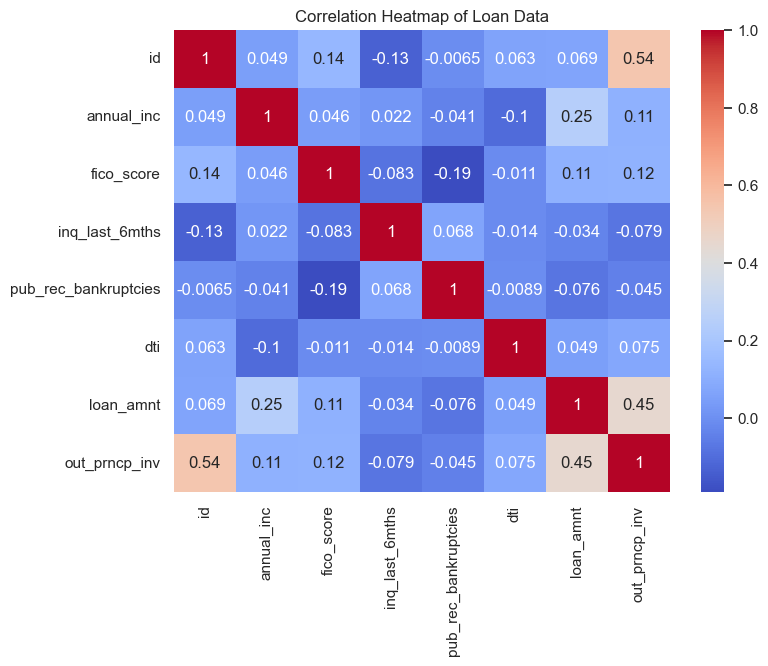

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df_lending.select_dtypes(include=['number']) #Select only numeric data
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Loan Data")
plt.show()

<span style = "color: Blue">**Correlation heatmap** that represents the relationship between different numerical variables in a loan dataset. The color scale on the right indicates correlation values, ranging from **-1 (strong negative correlation, blue)** to **+1 (strong positive correlation, red)**. 

**Key observations from the correlation heat map**:
   - **Loan amount (loan_amnt) and outstanding principal (out_prncp_inv)** have a **strong positive correlation (0.45)**, which implies that the larger loans tend to have higher outstanding balances.
     
   - **Annual income (annual_inc) and loan amount (loan_amnt) have a moderate positive correlation (0.25)**, indicating that higher-income individuals tend to take larger loans.
     
   - **FICO score (fico_score) has a weak correlation with most other variables**, suggesting it does not have a strong direct relationship with loan amount or income. Being an important quantity for loan disbursal, I suppose I need to check its correlation with other columns.
        
   - **Debt-to-income ratio (dti) has a very low correlation with other variables**, indicating it is relatively independent in determining loan characteristics, which is also surprising to me. As I was expecting its relation to Fico score and the records of bankruptcies. 
     
   - **Public records of bankruptcies (pub_rec_bankruptcies) have a negative correlation with fico_score (-0.19)**, which is quite obvious as a low credit score would indicate a high likelihood of bankruptcies.

### 10. **Understanding `correlation between annual income, outstanding principal and loan amount`**

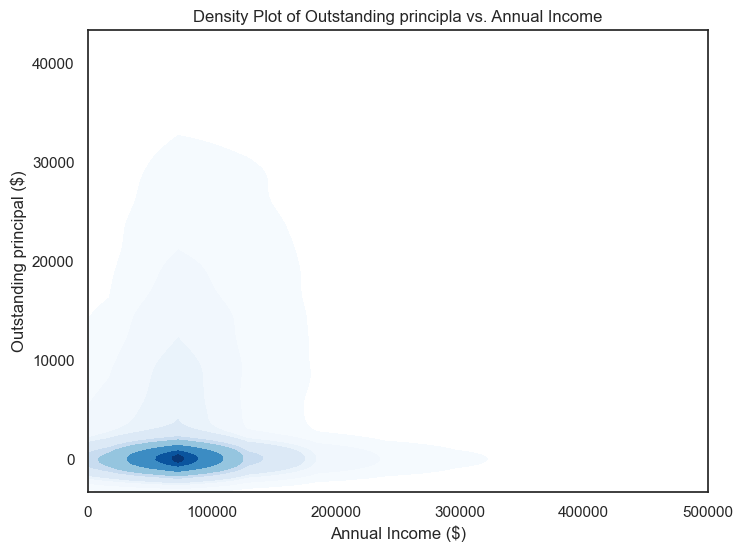

In [290]:
# 2D KDE Plot to show density correlation
plt.figure(figsize=(8, 6)) 
sns.kdeplot(data=df_numeric, x='annual_inc', y='out_prncp_inv',cmap="Blues", fill=True) #kde stands for kernel density estimation
plt.title("Density Plot of Outstanding principla vs. Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Outstanding principal ($)")
#plt.yscale('log')
plt.xlim([0,0.5e6])
plt.show()

**Key observations:**

- The darkest region (highest density) is concentrated around:
Annual Income: ~$50,000 - $100,000
Outstanding Principal: Close to $0.
This suggests that most borrowers have either repaid a significant portion of their loans or started with smaller loan amounts. Most Borrowers Have Low Outstanding Principal & Moderate Annual Income.

- Higher-income borrowers have more spread in outstanding principal. As annual income increases (above ~$100,000), there is more variance in outstanding principal. Some high-income borrowers still have high outstanding balances, possibly due to faster repayment or lower borrowing needs.
  
- The upper-right portion of the plot is mostly lightly shaded. This suggests that very high-income individuals are less likely to have large outstanding principals.

- Borrowers with low annual income (<$50,000) mostly have smaller outstanding principal balances.

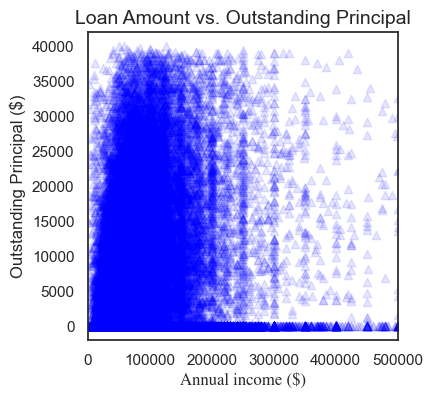

In [240]:
#Scatter plots
plt.figure(figsize=(4, 4)) 
plt.scatter(df_numeric["annual_inc"], df_numeric["out_prncp_inv"], marker = '^', c = 'blue', alpha = 0.1) 
plt.xlabel("Annual income ($)", fontsize=12, font = "Times")
plt.ylabel("Outstanding Principal ($)", fontsize=12)
plt.xlim([0,0.5e6])
plt.title("Loan Amount vs. Outstanding Principal", fontsize=14)
plt.show()

**Key takeaways from the data**
- Loans with high amounts still having high outstanding balances could be at a higher risk of default.
- Lower outstanding balances suggest repayments are happening as expected.

### **Plot the `Loan status` versus `Annual income` data**

/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_50412/3459148966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_lending, x="loan_status_new", y="annual_inc", palette="coolwarm", inner="quartile", alpha=0.8, )


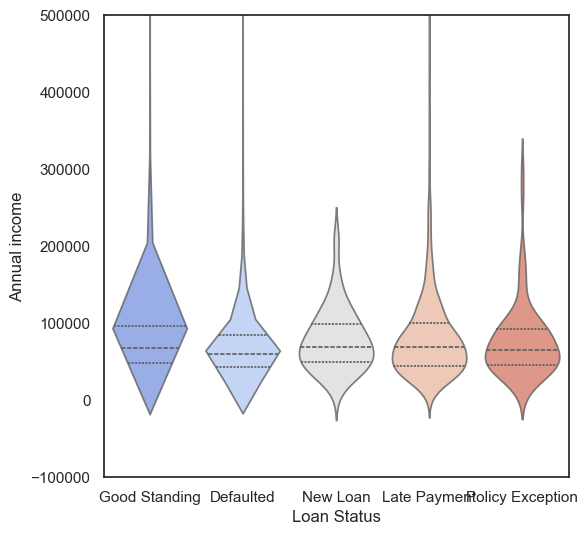

In [281]:
# Create a violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(data=df_lending, x="loan_status_new", y="annual_inc", palette="coolwarm", inner="quartile", alpha=0.8, )
plt.xlabel("Loan Status")
plt.ylabel("Annual income")
#plt.yscale("log")
plt.ylim([-1e5,0.5e6])
plt.show()

**Key observation from the categorical plots**

- Dashed lines inside the violins represent the interquartile range (IQR). The black bar in the middle of each violin represents the median annual income.
- The width of each violin represents the density of borrowers in that income range. 
- Some very high-income borrowers exist in all loan statuses (long tails).
- Negative or zero values appear, (which is unclear to 


### 11. Handling outliers

**z-score and interquartile**
In the subsequent section, we will deal with the new quantity named `fico_score` which is related to the fico credit score.

In [151]:
from scipy import stats
import numpy as np
import seaborn as sns

# Calculating on a single column, e.g. loan amount
z_scores = np.abs(stats.zscore(df_lending.select_dtypes(include = [np.number])))
# Define a threshold for identifying outliers
threshold = 3

# How many outliers identified for each numerical columns?
print("\nSummarize outliers:")
gt_thresh = z_scores > threshold
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                          , ascending= False)


Summarize outliers:


,num_outliers
out_prncp_inv,2703
fico_score,1107
inq_last_6mths,1002
annual_inc,567
pub_rec_bankruptcies,481
dti,365
id,0
loan_amnt,0


### Plot the fico score `fico_score` 

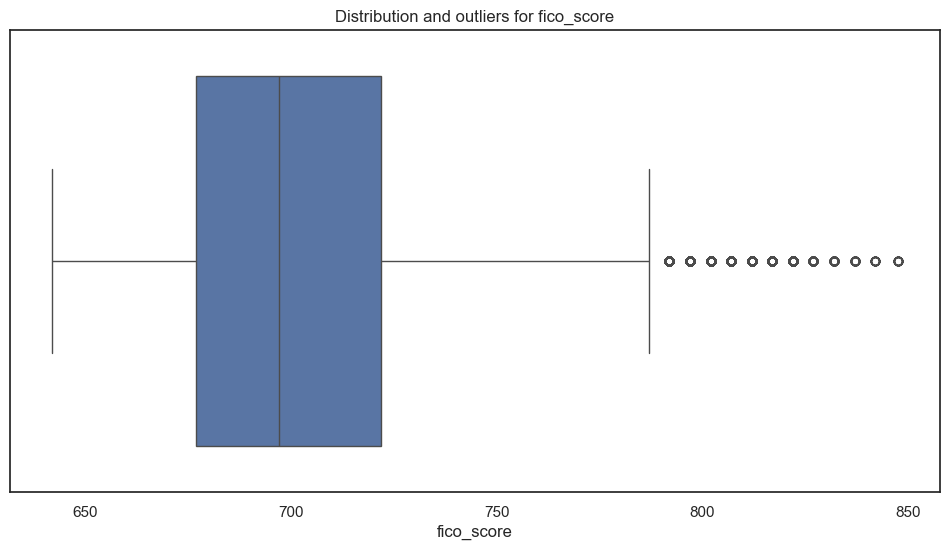

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "fico_score" 

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_lending[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 772.0
Maximum value of z score after capping: 2.2655450025913604


/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_50412/1599783253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lending[field_to_treat_capped] = np.where(df_lending[field_to_treat]


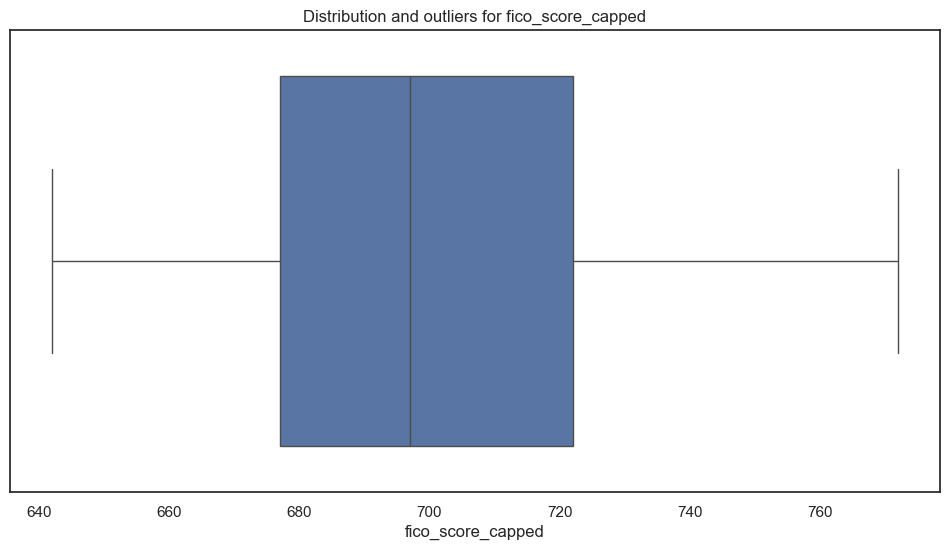

In [154]:
# Capping outliers
field_to_treat = "fico_score" 
field_to_treat_capped = f"{field_to_treat}_capped" 

cap_value = df_lending[field_to_treat].quantile(0.95) #Capping outliers at 95th percentile
print(f"Value to be applied as cap: {cap_value}")
df_lending[field_to_treat_capped] = np.where(df_lending[field_to_treat] 
                                             > cap_value, cap_value, df_lending[field_to_treat])
print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df_lending[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_lending[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()